In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.version.version


'1.19.5'

In [11]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

nltk.download('averaged_perceptron_tagger')

def preprocess(sent):
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/sakshamm/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [8]:
# Import pandas 
import pandas as pd 
        
# Read csv file  
table = pd.read_csv("../raw/usa_with_details.csv") 
# Print it out if you want to...
table_n = table.shape[0]


In [10]:
# Get List of Org Names from BusinessName column as well as description
table_x_org_names = []
sent = preprocess('hi my name is saksham mrig, I work at goldman sachs')
pattern = 'NP: {<DT>?<JJ>*<NN>}'
cp = nltk.RegexpParser(pattern)
cs = cp.parse(sent)
print(cs)

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/PY3/english.pickle[0m

  Searched in:
    - '/home/sakshamm/nltk_data'
    - '/home/sakshamm/environments/my_env/nltk_data'
    - '/home/sakshamm/environments/my_env/share/nltk_data'
    - '/home/sakshamm/environments/my_env/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


In [45]:
from nltk.chunk import conlltags2tree, tree2conlltags
from pprint import pprint
iob_tagged = tree2conlltags(cs)
pprint(iob_tagged)

[('hi', 'NN', 'B-NP'),
 ('my', 'PRP$', 'O'),
 ('name', 'NN', 'B-NP'),
 ('is', 'VBZ', 'O'),
 ('saksham', 'JJ', 'B-NP'),
 ('mrig', 'NN', 'I-NP'),
 (',', ',', 'O'),
 ('I', 'PRP', 'O'),
 ('work', 'VBP', 'O'),
 ('at', 'IN', 'O'),
 ('goldman', 'NN', 'B-NP'),
 ('sachs', 'NN', 'B-NP')]


In [49]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
import math


In [50]:
table_x_orgs = []

for i in range (table_n):
    all_orgs_in_row = []
    text = str(table['BusinessName'][i])
    doc = nlp(text)
    for X in doc.ents:
        if X.label_ == 'ORG':
            all_orgs_in_row.append(X.text)
#     pprint([(X.text, X.label_) for X in doc.ents])
    table_x_orgs.append(all_orgs_in_row)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [16]:
table_x_work_from_home = []
table_dict_orgs = {}
count = 0 
test = ['work from home','remote work','work at home', 'remote job']
def checkifoneof (test, stri):
    for i in test :
        if stri.find(i)>0:
            return True
    return False 
for i in range (table_n):
    text = str(table['Description'][i])
    text = text.lower()
    row = []
    if (len(table_x_orgs[i])>0 and checkifoneof(test,text)):
        cou
        nt += 1
        row = (table_x_orgs[i])
        for i in table_x_orgs[i]:
            i = i.lower()
            if i in table_dict_orgs:
                table_dict_orgs[i]+=1
            else :
                table_dict_orgs[i] = 1
    table_x_work_from_home.append(row)
print(count)
print({k: v for k, v in sorted(table_dict_orgs.items(), key=lambda item: item[1])})


61
{'letellier logistic solutions': 1, 'international technologies': 1, 'namko services inc': 1, 'concentrix canada': 1, 'namko services inc.': 1, 'logistics inc.': 1, 'norstan canada ltd spoofer/imposter': 1, 'gdub holdings ltd.': 1, 'ultra prime transport inc.': 1, 'morefield logistics services': 1, 'smart': 1, 'ejc': 1, 'dba': 1, 'viodiaq consulting': 1, 'mcconnell transport': 1, 'andores digital inc.': 1, 'global education community': 1, 'shoppers drug mart': 1, 'manasvi technical consulting group inc.': 1, 'ittas spoof': 1, 'white coin ltd': 1, 'nayton inc': 1, 'sameer': 1, 'xeo marketing': 1, 'jovenes staffing inc.': 1, 'reid consulting services': 1, 'pty ltd': 1, 'cargill inc.': 1, 'dino tech inc': 1, 'discovery multicultural society': 1, 'charlotte mikayla': 1, 'dudes': 1, 'huddleston jobs inc.': 1, 'cofra group': 1, 'baby freight lines': 1, 'gongtec solutions': 1, 'arithmos financial innovations inc.': 1, 'bitcoin group canada': 1, 'staffing inc.': 1, 'procor repair services':

In [74]:
table_x_ = []
table_dict_orgs = {}
count = 0 
test = ['work from home','remote work','work at home', 'remote job']
method_of_approach = {
    'email':0,
    'facebook':0,
    'call':0
}
approach = []
def checkifoneof (test, stri):
    for i in test :
        if stri.find(i)>0:
            return True
    return False 
for i in range (table_n):
    text = str(table['Description'][i])
    text = text.lower()
    row = []
    if (checkifoneof(test,text) and checkifoneof(['email','facebook',' call ','called'],text)):
        count += 1
        if checkifoneof(['email'],text):
            approach.append(0)
            method_of_approach['email'] +=1
        elif checkifoneof([' call ','called'],text):
            approach.append(1)
            method_of_approach['call'] +=1
        elif checkifoneof(['facebook'],text):
            approach.append(2)
            method_of_approach['facebook'] +=1
    else :
        approach.append(3)
print(count)

print(method_of_approach)

1531
{'email': 1278, 'facebook': 51, 'call': 202}


In [75]:

%matplotlib inline
import geopandas as gpd
import geoplot as gplt
usa_cities = gpd.read_file(gplt.datasets.get_path('usa_cities'))
usa_cities.head()
import json

<AxesSubplot:>

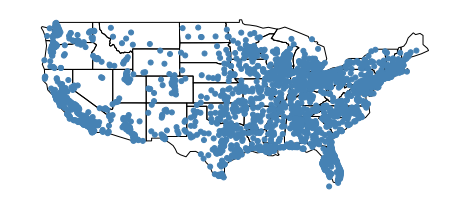

In [76]:
ax = gplt.polyplot(contiguous_usa)
gplt.pointplot(continental_usa_cities, ax=ax)

In [77]:
import matplotlib.pyplot as plt
import datetime
import calendar

def add_months(sourcedate, months):
    month = sourcedate.month - 1 + months
    year = sourcedate.year + month // 12
    month = month % 12 + 1
    day = min(sourcedate.day, calendar.monthrange(year,month)[1])
    return datetime.date(year, month, day)

In [78]:
table2 =table
table2["approach"]=approach

Lats = []
Longs = []
for i in table['LatLong']:
    Lats.append(json.loads(i)['la'])
    Longs.append(json.loads(i)['lo'])
table2['Lats'] = Lats
table2['Longs'] = Longs

In [79]:
gdf = gpd.GeoDataFrame(
    table2, geometry=gpd.points_from_xy(table2.Longs, table2.Lats))

In [80]:
contig = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))
extent = contig.total_bounds

<AxesSubplot:>

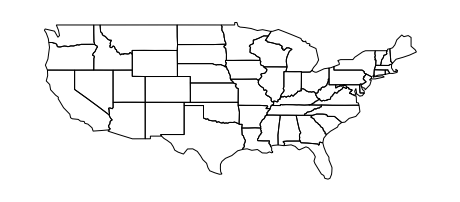

In [81]:
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))
gplt.polyplot(contiguous_usa)

In [89]:
table["C"]

0        Feb 03, 2021
1        Feb 03, 2021
2        Feb 03, 2021
3        Feb 03, 2021
4        Feb 03, 2021
             ...     
16151    Mar 04, 2015
16152    Mar 04, 2015
16153    Mar 03, 2015
16154    Feb 26, 2015
16155    Feb 25, 2015
Name: C, Length: 16156, dtype: object

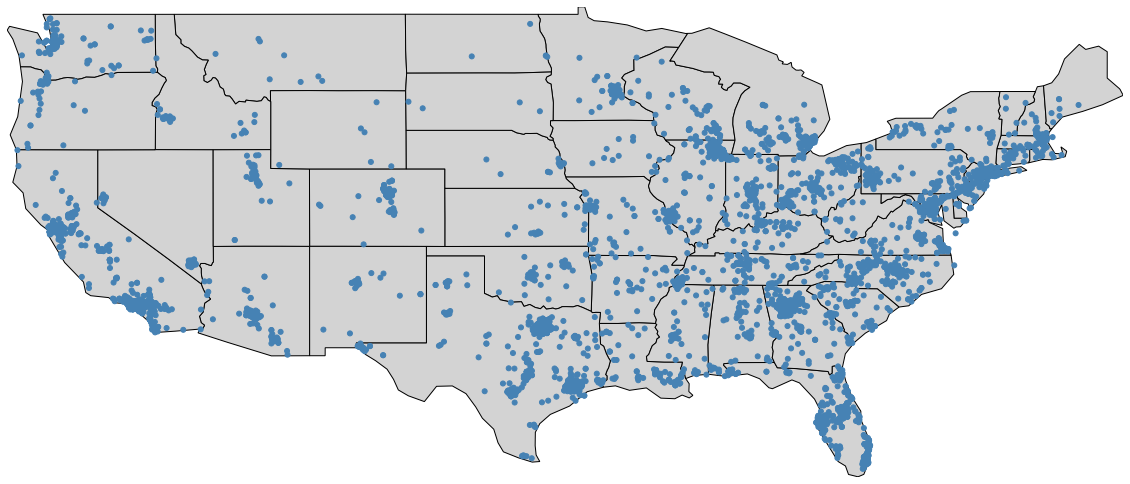

In [82]:
StartTime = datetime.datetime(2018, 1, 1)
date1 = StartTime
count = 0
count+=1
Mon = date1.strftime("%b")
Date = date1.strftime("%d")
Year = date1.strftime("%Y")
ax = gplt.polyplot(contig,figsize=(20,20),facecolor='lightgray')
gplt.pointplot(gdf[gdf.C.str.contains(Year)] ,ax=ax, extent = extent)
plt.savefig('./images/img'+str(count).zfill(3)+'.png')
date1 = add_months(date1,1)



In [87]:
import mapclassify
scheme = mapclassify.Quantiles(gdf.d, k=15)

/home/saksham/.local/lib/python3.8/site-packages/mapclassify/classifiers.py:234: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/home/saksham/.local/lib/python3.8/site-packages/mapclassify/classifiers.py:237: UserWarning: Warning: setting k to 4
  Warn("Warning: setting k to %d" % k_q, UserWarning)


<AxesSubplot:>

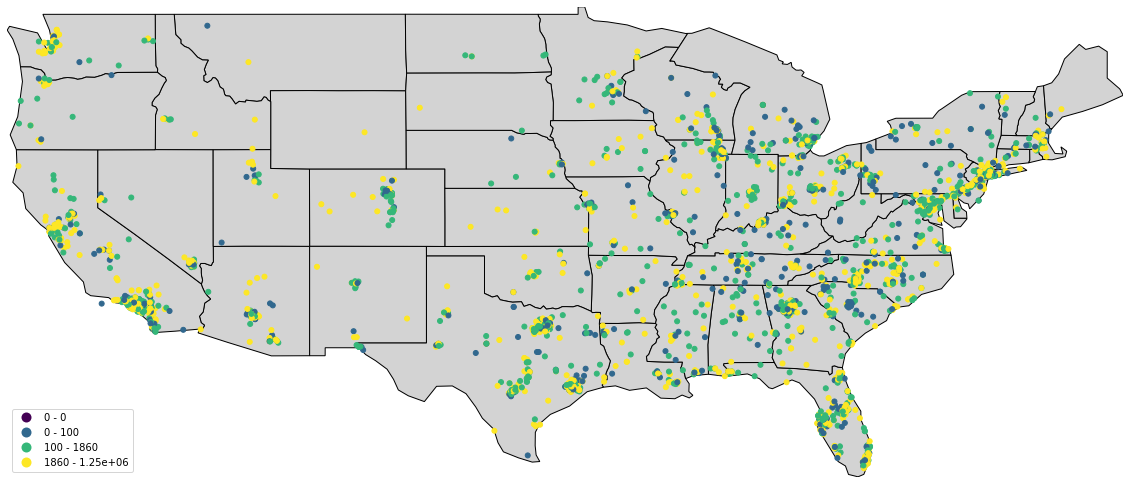

In [88]:
StartTime = datetime.datetime(2018, 9, 4)
date1 = StartTime       
Mon = date1.strftime("%b")
Date = date1.strftime("%d")
Year = date1.strftime("%Y")
ax = gplt.polyplot(contig, figsize =(20,20),facecolor='lightgray')
gplt.pointplot(gdf[ (gdf.d >0)], scheme=scheme ,ax=ax, extent = extent, hue="d", legend = True)
# gplt.pointplot(gdf[ gdf.C.str.contains(Year) & gdf.d == 0] ,ax=ax, extent = extent, color="red")

# plt.savefig('./images/img'+str(count).zfill(3)+'.png')

/home/saksham/.local/lib/python3.8/site-packages/mapclassify/classifiers.py:234: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/home/saksham/.local/lib/python3.8/site-packages/mapclassify/classifiers.py:237: UserWarning: Warning: setting k to 4
  Warn("Warning: setting k to %d" % k_q, UserWarning)


<AxesSubplot:>

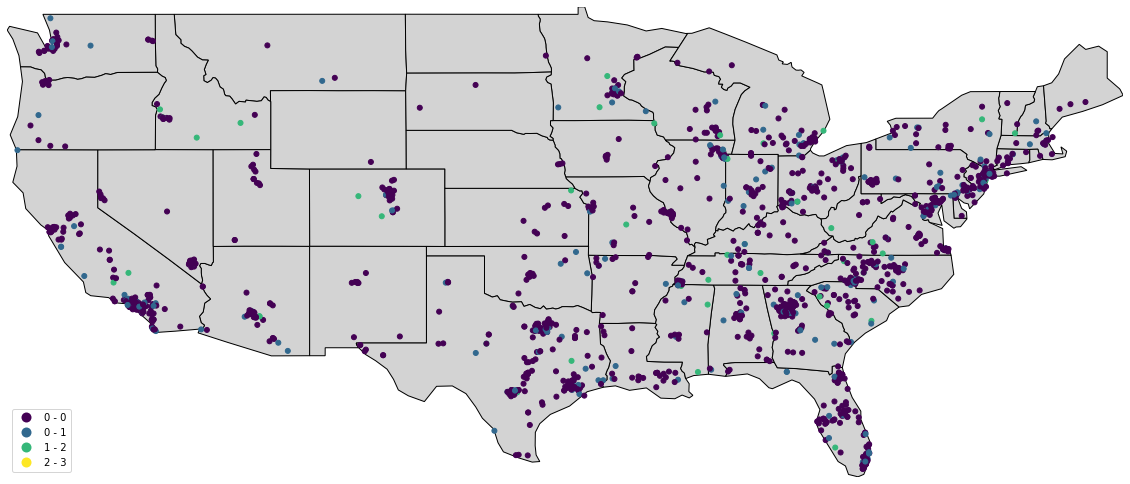

In [34]:
scheme = mapclassify.Quantiles(approach, k=500)
StartTime = datetime.datetime(2020, 9, 4)
date1 = StartTime       
Mon = date1.strftime("%b")
Date = date1.strftime("%d")
Year = date1.strftime("%Y")
ax = gplt.polyplot(contig, figsize =(20,20),facecolor='lightgray')
gplt.pointplot(gdf[ (gdf.approach <3) ], scheme=scheme ,ax=ax, extent = extent, hue="approach", legend = True)
# gplt.pointplot(gdf[ gdf.C.str.contains(Year) & gdf.d == 0] ,ax=ax, extent = extent, color="red")

# plt.savefig('./images/img'+str(count).zfill(3)+'.png')

Banking details

In [ ]:
table_x_ = []
table_dict_orgs = {}
count = 0 
test = ['work from home','','work at home', 'remote job']
method_of_approach = {
    'email':0,
    'facebook':0,
    'call':0
}
approach = []
def checkifoneof (test, stri):
    for i in test :
        if stri.find(i)>0:
            return True
    return False 
for i in range (table_n):
    text = str(table['Description'][i])
    text = text.lower()
    row = []
    if (checkifoneof(test,text) and checkifoneof(['email','facebook',' call ','called'],text)):
        count += 1
        if checkifoneof(['email'],text):
            approach.append(0)
            method_of_approach['email'] +=1
        elif checkifoneof([' call ','called'],text):
            approach.append(1)
            method_of_approach['call'] +=1
        elif checkifoneof(['facebook'],text):
            approach.append(2)
            method_of_approach['facebook'] +=1
    else :
        approach.append(3)
print(count)

print(method_of_approach)